# Experiment 3

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
x_train = np.array([1, 2, 4, 6, 7])
y_train = np.array([2, 3, 5, 2, 3])
x_train.shape

(5,)

In [8]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = (1/(2*m))*cost

    return total_cost

In [9]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m       

    return dj_dw, dj_db

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

    return w, b

In [20]:
w_init = 0
b_init = 0

iterations = 10
tmp_alpha = 1.0e-2

w_final, b_final = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")
print(f"Calculating the cost: {compute_cost(x_train, y_train, w_final, b_final)}")

(w,b) found by gradient descent: (  0.5019,   0.1623)
Calculating the cost: 1.4991603768378514


In [21]:
def final_y(x, w_final, b):
    y_pred = []
    for i in range(x.shape[0]):
        y = w_final * x[i] + b
        print(f"x[{i}] = {x[i]}, w_final = {w_final}, b = {b}, y = {y}") 
        y_pred.append(y)
    return y_pred
y_pred = final_y(x_train, w_final, b_final)
y_pred

x[0] = 1, w_final = 0.5018709112677034, b = 0.16226206979476226, y = 0.6641329810624657
x[1] = 2, w_final = 0.5018709112677034, b = 0.16226206979476226, y = 1.1660038923301692
x[2] = 4, w_final = 0.5018709112677034, b = 0.16226206979476226, y = 2.169745714865576
x[3] = 6, w_final = 0.5018709112677034, b = 0.16226206979476226, y = 3.173487537400983
x[4] = 7, w_final = 0.5018709112677034, b = 0.16226206979476226, y = 3.6753584486686863


[0.6641329810624657,
 1.1660038923301692,
 2.169745714865576,
 3.173487537400983,
 3.6753584486686863]

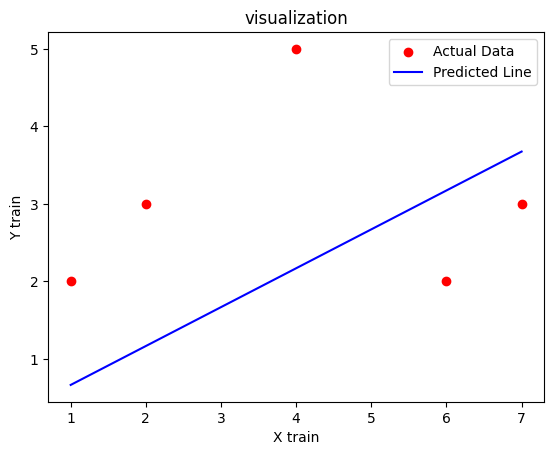

In [22]:
plt.scatter(x_train, y_train, color = 'r', label = 'Actual Data')
plt.xlabel("X train")
plt.ylabel("Y train")
plt.title("visualization")
plt.plot(x_train, y_pred, color = 'blue', label = 'Predicted Line')
plt.legend()
plt.show()